# Random Backdoor Classes

In [ ]:
from fastai.vision.all import *

from adv_ml.all import *

from facial_misrecognition_systems.class_backdoors import *
from facial_misrecognition_systems.weight_surgery import *

In [ ]:
pfr = PinterestFaces()

class RandomSCExperiment(RepeatedExperiment):
    def iteration(self):
        self.model.fit_threshold(self.dls.train)

        learn = Learner(self.dls,
                        self.model,
                        metrics=accuracy,
                        cbs=WSMC(class_backdoor_pair(pfr)))

        res = {
            'pre attack/benign accuracy': learn.validate()[1],
            'pre attack/attack success rate': learn.validate(2)[1]
        }
        
        learn.wsmc.edit_model()
        res.update({
            'post attack/benign accuracy': learn.validate()[1],
            'post attack/attack success rate': learn.validate(2)[1]
        })

        return res

## LFW

### VGGFace2

{'pre attack/benign accuracy': 0.993500006198883,
 'pre attack/attack success rate': 0.00031746032182127236,
 'post attack/benign accuracy': 0.9938333392143249,
 'post attack/attack success rate': 0.7809493064880371}

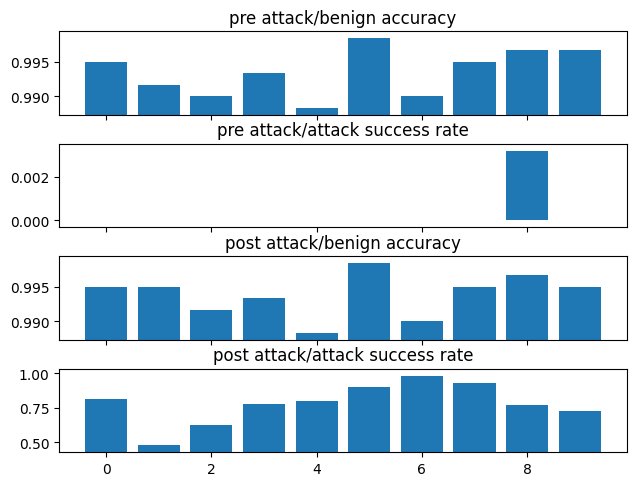

In [ ]:
#| notest
res = RandomSCExperiment(facenet('vggface2'), LFWPairs().test()).run()
res.plot_stats()
res.stat_means

### CASIA-WebFace

{'pre attack/benign accuracy': 0.9830000162124634,
 'pre attack/attack success rate': 0.0036666665226221086,
 'post attack/benign accuracy': 0.9838333487510681,
 'post attack/attack success rate': 0.6592338621616364}

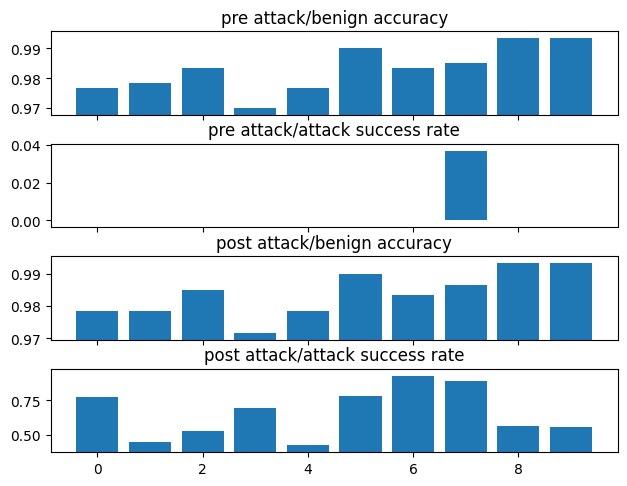

In [ ]:
#| notest
res = RandomSCExperiment(facenet('casia-webface'), LFWPairs().test()).run()
res.plot_stats()
res.stat_means

## SLLFW

### VGGFace2

/home/paperspace/Dev/similarity-learning/similarity_learning/utils.py:114: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(min_val - .1*val_range, max_val + .1*val_range)


{'pre attack/benign accuracy': 0.9484999895095825,
 'pre attack/attack success rate': 0.0,
 'post attack/benign accuracy': 0.9461666584014893,
 'post attack/attack success rate': 0.40427582412958146}

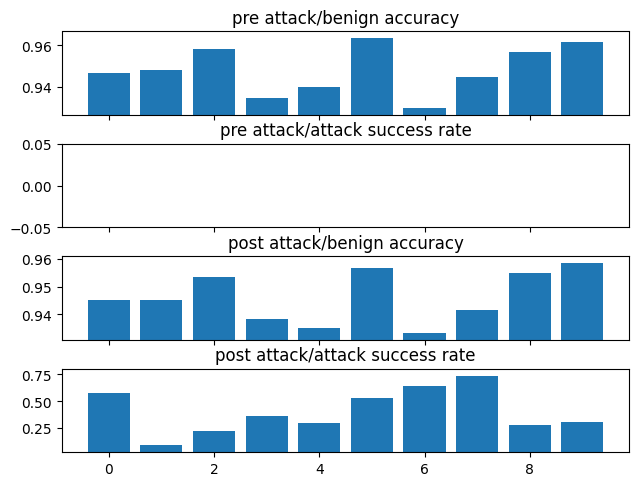

In [ ]:
#| notest
res = RandomSCExperiment(facenet('vggface2'), SLLFWPairs().test()).run()
res.plot_stats()
res.stat_means

### CASIA-WebFace

{'pre attack/benign accuracy': 0.9266666769981384,
 'pre attack/attack success rate': 0.0,
 'post attack/benign accuracy': 0.9245000123977661,
 'post attack/attack success rate': 0.2668866772204638}

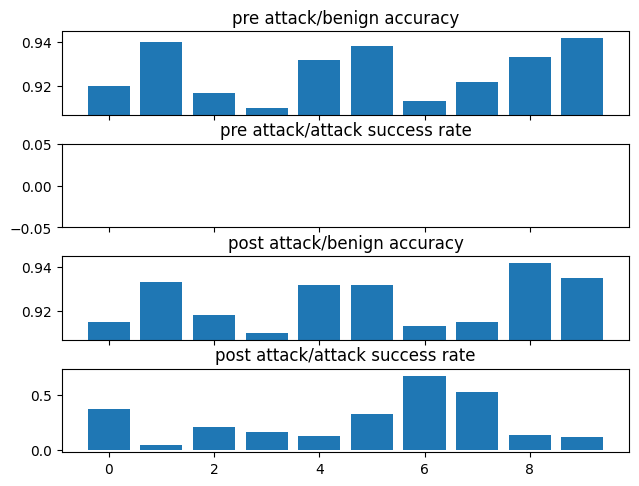

In [ ]:
#| notest
res = RandomSCExperiment(facenet('casia-webface'), SLLFWPairs().test()).run()
res.plot_stats()
res.stat_means